# Optimización de partículas.

## Librerías necesarias.

In [99]:
!pip install pyswarms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, 
                                     plot_surface)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML

## Rosenbrock 3d

In [101]:
def rosenbrock(X):
    result = 0
    for i in range(len(X)-1):
        result += 100*(X[i+1]-X[i]**2)**2+(X[i]-1)**2
    return result

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k':10, 'p':2, 'max_velocity': 1,
           'min_velocity':-1, 'bounds':([-5,-5],[5,5]), 'iterations': 100,
           'n_particles': 25, 'verbose': True, 'history': True} # configurar el historial

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

cost, pos = optimizer.optimize(fx.rosenbrock, iters=100)
print(pos)
soluciones_rosenbrock = optimizer.pos_history

2023-04-28 22:14:40,805 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2, 'max_velocity': 1, 'min_velocity': -1, 'bounds': ([-5, -5], [5, 5]), 'iterations': 100, 'n_particles': 25, 'verbose': True, 'history': True}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.00453
2023-04-28 22:14:41,007 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0045324144824273015, best pos: [0.93365155 0.87056373]


[0.93365155 0.87056373]


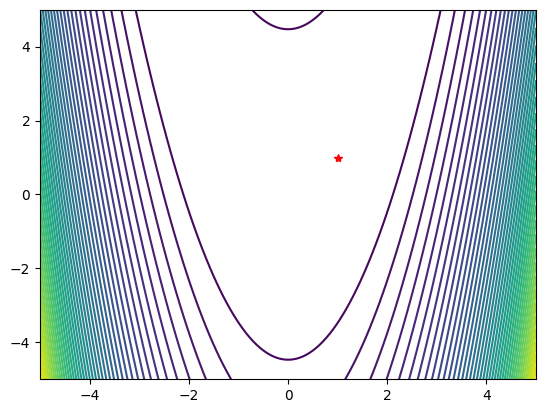

In [102]:
# Gráfia de la función Rosenbrock 
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 
Z = rosenbrock((X,Y))

fig, ax = plt.subplots()
ax.plot(1,1,"r*")
plot, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)

ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.contour(X,Y,Z, levels = 50)
scatter, = ax.plot([], [], marker="o", linestyle="", color="blue")

# initialization function: plot the background of each frame
def init():
    scatter.set_data([], [])
    return (scatter,)

# animation function. This is called sequentially
def animate(i):
    scatter.set_data(soluciones_rosenbrock[i][:,0], soluciones_rosenbrock[i][:,1])
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(soluciones_rosenbrock)-1, interval=150, blit=True)

In [103]:
HTML(anim.to_html5_video())

2023-04-28 22:14:41,457 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-04-28 22:14:41,466 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 6.666666666666667 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmp7jfsg8xl/temp.m4v


In [104]:
anim.save("PSO_ros3d.gif", dpi=120, writer="pillow")

2023-04-28 22:14:49,687 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


## Rosenbrock 4d

In [105]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)

cost, pos = optimizer.optimize(fx.rosenbrock, iters=300)
print(pos)
pop_hist = optimizer.pos_history

2023-04-28 22:15:14,822 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2, 'max_velocity': 1, 'min_velocity': -1, 'bounds': ([-5, -5], [5, 5]), 'iterations': 100, 'n_particles': 25, 'verbose': True, 'history': True}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.00405
2023-04-28 22:15:15,834 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.004046551375241884, best pos: [0.97111045 0.9435088  0.89017121]


[0.97111045 0.9435088  0.89017121]


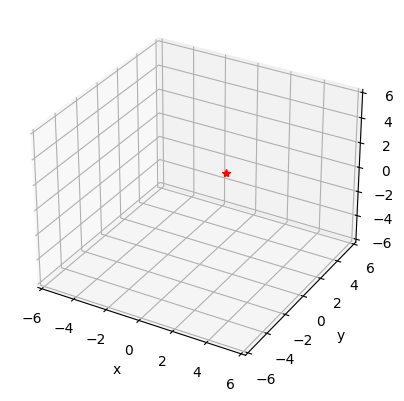

In [106]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(1,1,1, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = pop_hist[i][:, 0]
    y_points = pop_hist[i][:, 1]
    z_points = pop_hist[i][:, 2]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(pop_hist)-1, interval=50, blit=True)

In [107]:
HTML(anim.to_html5_video())

2023-04-28 22:15:17,131 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-04-28 22:15:17,135 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpc1opwh5e/temp.m4v


In [108]:
anim.save("PSO_ros4d.gif", dpi=120, writer="pillow")

2023-04-28 22:15:43,744 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


## Six hump camel 3d

In [109]:
def six_hump_camel(X):
    if len(X) == 3:
        x = np.float64(X[0])
        y = np.float64(X[1])
        z = np.float64(X[2])
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2+z**2
    else:
        x = np.float64(X[0])
        y = np.float64(X[1])
        return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2

def shc_handler(X):
  results = []
  for i in X:
    results.append(six_hump_camel(i))
  return np.array(results)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options=options)

cost, pos = optimizer.optimize(shc_handler, iters=200)
print(pos)
pop_hist = optimizer.pos_history

2023-04-28 22:16:24,918 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2, 'max_velocity': 1, 'min_velocity': -1, 'bounds': ([-5, -5], [5, 5]), 'iterations': 100, 'n_particles': 25, 'verbose': True, 'history': True}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-1.03
2023-04-28 22:16:25,249 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0316284524705477, best pos: [-0.08985809  0.71265891]


[-0.08985809  0.71265891]


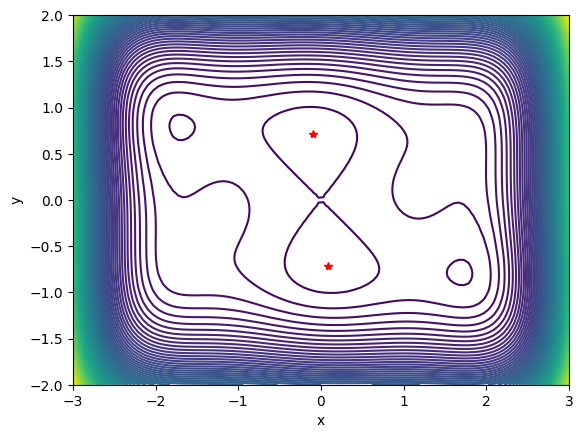

In [110]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = six_hump_camel((X, Y))

fig, ax = plt.subplots()

ax.set_xlim((-3, 3))
ax.set_ylim((-2, 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.contour(X,Y,Z, levels = 100)
ax.plot(0.0898,-0.7126, "r*")
ax.plot(-0.0898,0.7126, "r*")
plot, = ax.plot([], [], color='blue', linestyle="", marker='o', markersize=4)


def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    plot.set_data(pop_hist[i][:, 0], pop_hist[i][:, 1])
    return (plot,)

anim = animation.FuncAnimation(fig,
                               animate,
                               init_func=init,
                               frames=len(pop_hist)-1,
                               interval=50,
                               blit=True)

In [111]:
HTML(anim.to_html5_video())

2023-04-28 22:16:25,938 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-04-28 22:16:25,941 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpg0qlsg0k/temp.m4v


In [112]:
anim.save("PSO_camel3d.gif", dpi=120, writer="pillow")

2023-04-28 22:16:52,806 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


## Six hump camel 4d

In [113]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=3, options=options)

cost, pos = optimizer.optimize(shc_handler, iters=200)
print(pos)
pop_hist = optimizer.pos_history

2023-04-28 22:17:40,529 - pyswarms.single.global_best - INFO - Optimize for 200 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 10, 'p': 2, 'max_velocity': 1, 'min_velocity': -1, 'bounds': ([-5, -5], [5, 5]), 'iterations': 100, 'n_particles': 25, 'verbose': True, 'history': True}
pyswarms.single.global_best: 100%|██████████|200/200, best_cost=-1.03
2023-04-28 22:17:40,859 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -1.0316284530772708, best pos: [-8.98390543e-02  7.12649422e-01 -1.87522892e-07]


[-8.98390543e-02  7.12649422e-01 -1.87522892e-07]


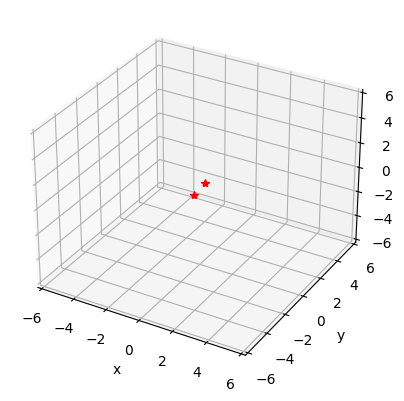

In [114]:
ncols = 150
nrows = 150
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_zlim((-6, 6))
ax.plot(0.0898,-0.7126, 0, "r*")
ax.plot(-0.0898,0.7126, 0, "r*")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plot, = ax.plot([], [], color='blue', marker='o', markersize=4, linestyle='')

def init():
    plot.set_data([],[])
    return (plot,)

def animate(i):
    x_points = pop_hist[i][:, 0]
    y_points = pop_hist[i][:, 1]
    z_points = pop_hist[i][:, 2]
    plot.set_data(x_points, y_points)
    plot.set_3d_properties(z_points)
    return (plot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(pop_hist)-1, interval=50, blit=True)


In [115]:
anim.save("PSO_camel4d.gif", dpi=120, writer="pillow")

2023-04-28 22:17:41,358 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.PillowWriter'>


In [116]:
HTML(anim.to_html5_video())

2023-04-28 22:18:07,324 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2023-04-28 22:18:07,328 - matplotlib.animation - INFO - MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpo8bc5v3y/temp.m4v
